In [1]:
import numpy as np
import pandas as pd
import scipy as stats
from scipy.stats import skew
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import r2_score

## Citations
Source 1: 'Intermediate Data Cleaning' by Kevin Crystal, GA-DSI alumn
- https://medium.com/@kevin.a.crystal/intermediate-data-cleaning-195e1af3ccf9
- Mostly used for conceptual approach to cleaning.  Noted in code notes if actual code used.


Source 2: 'Comprehensive data exploration with Python' by Pedro Marcelino
- https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
- ripped code to print df of nulls and what % of the column those nulls represent


Source 3: 'A study on Regression applied to the Ames dataset' by Julien Cohen Solal
- https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset

Source 4: 'Trying out a linear model' by Alexandru Papiu
- https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models

In [2]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [3]:
ames = pd.read_csv('./datasets/train.csv')

In [4]:
print(ames.shape)
ames.head()

(2051, 81)


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
ames.columns = ames.columns.str.lower().str.replace(" ","_")

In [6]:
#ames.info()

In [7]:
#check for duplicate IDs
ames.shape[0] - len(set(ames.id))

0

In [8]:
#nulls and what % of factor, code from Source 2
nulls= ames.isnull().sum().sort_values(ascending=False)
perc= (ames.isnull().sum()/ames.isnull().count()).sort_values(ascending=False)
missing_data= pd.concat([nulls, perc],axis=1, keys=['# nulls', '% null'])
missing_data.head(27)

,# nulls,% null
pool_qc,2042,0.995612
misc_feature,1986,0.968308
alley,1911,0.931741
fence,1651,0.804973
fireplace_qu,1000,0.487567
lot_frontage,330,0.160897
garage_finish,114,0.055583
garage_cond,114,0.055583
garage_qual,114,0.055583
garage_yr_blt,114,0.055583


### Uninformative columns
The top four features in the above chart (nulls and % nulls) have over 80% null values.  Given this lack of data, these columns are being considered for removal from analysis.

Secondly, 'Fence' is described as ordinal, but the categories are not well delineated: ie a fence can be good wood (GdWo) and minimum privacy (MnPrv), or other combos.  This confusion may introduce more noise than information.

For cleaning consistency, I will first proceed with cleaning nulls from the whole dataset, but remember that the following four columns are candidates for removal unless compelling correlations come to light. 
- Alley
- Misc Feature
- Pool QC
- Fence

### False Nulls
According to the data dictionary, 'NA' can be used to indicate that a particular property attribute does not exist, amidst an otherwise ordinal list of ranking that attribute.  For instance, 'Rating of basement finished area' is on a scale of Unfinished up to Good Living Quarters, with NA indicating that there is no basement.  In this scenario, NA can = 0, Unfinished = 1, and Good Living Quarters = max.

NA is defined as its own level of ordinal rank (0) in the case of 12 variables.  Many of these share the same 6-level scale (NA, Po, Fa, TA, Gd, Ex).  They also share this scale with other ordinal variables in the dataset that do not contain (or define) NA.  I will convert all of these to a numeric scale together, with Na=0 to Ex=5.  

The Pool variable has all of these levels except for 'Po'; I will still include it in this same scale and just record 0 entries at (Po:1).  Apparently in Ames, any pool is already considered 'Fair', but as a water sport athlete I can tell you there are DEFINITELY 'Poor' pools and Ames county is ignoring a valuable metric.

In [9]:
#cols needing transform from (ordinal) object to numeric
nans_to_zeros = ['bsmt_qual','bsmt_cond', 'fireplace_qu','garage_qual', 'garage_cond',
                 'kitchen_qual', 'exter_qual','exter_cond','heating_qc','garage_finish', 
                 'bsmt_exposure','bsmtfin_type_1','bsmtfin_type_2', 'pool_qc', 'fence']

nans_as_nans = ['lot_shape','utilities','land_slope', 'electrical','functional']

In [10]:
to_num_masterdict={'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5, #nans_to_zeros cols.
'Unf':1, 'RFn':2, 'Fin':3, #garage_finish
'MnWw':1, 'GdWo':2, 'MnPrv':3, 'GdPrv':4, #fence
'No':1, 'Mn':2, 'Av':3, 'Gd':4,#bsmt_exposure
'Unf':1, 'LwQ':2,'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6, #bsmtfin_type_1 and 2
'IR3':1, 'IR2':2, 'IR1':3, 'Reg':4, #lot_shape
'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'Allpub':4, #utilities
'Sev':1, 'Mod':2, 'Gtl':3, #land_slope
'Sal':0, 'Sev':1, 'Maj2':2, 'Maj1':3, 'Mod':4, 'Min2':5, 'Min1':6, 'Typ':7, #functional
'Mix':1, 'FuseP':2, 'FuseF':3, 'FuseA':4, 'SBrkr':5} #electrical

In [11]:
#conversion function
def to_nums_w_zeros(df, targetcols):
    for i in targetcols:
        df[i] = df[i].map(to_num_masterdict)
        df[i] = df[i].fillna(0)
        #print(df[targetcols].value_counts()) #this line to check work, from source1
        

In [12]:
to_nums_w_zeros(ames, nans_to_zeros)

In [13]:
#ames[nans_to_zeros].dtypes  #check that all converted to numeric

In [14]:
#ames.isnull().sum().sort_values(ascending=False).head(16)

### Remaining ordinals to numeric
The remaining 'object' variables that have an ordinal rank do not have NaN's equivalen to 0, so they should be subjected to a numeric transformation that preserves the NaN.  Luckily, none of the remaining features HAVE nulls, so they can be run through the same function without risking misinterpretation.

In [15]:
to_nums_w_zeros(ames, nans_as_nans)

In [16]:
#ames[nans_as_nans].dtypes  #check all numeric

### And the opposite: numerical to object
##### source 3 pointed this step out to me
The MS Subclass column is nominal, but the features have numeric assignments (ie, 020 = '1-story 1946 & newer all styles').  These categories are **not** ordinal: higher number are not necessarily newer nor larger properties.  Thus convert this column to object.

Similarly, Month should be categorized because numeric treatment doesn't make sense like it does for year.

In [17]:
to_obj_masterdict={20:'SC20', 30:'SC30', 40:'SC40', 45:'SC45', 50:'SC50', 60:'SC60',
                 70:'SC70', 75:'SC75', 80:'SC80', 85:'SC85', 90:'SC90', 120:'SC120',
                  150:'SC150', 160:'SC160', 180:'SC180', 190:'SC190', #ms_subclass
                  1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul',
                  8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'} #months

In [18]:
should_be_objs= ['ms_subclass','mo_sold']
def num_to_obj(df, targetcols):
    for i in targetcols:
        df[i] = df[i].map(to_obj_masterdict)

In [19]:
num_to_obj(ames, should_be_objs)

### Removing nulls from nominal vars
Several variables are nominal - so could not fit into the above numerical transformation - but still have NaN's that represent 0.  ie no garage, no alley access, no pool.  Below we will replace these NaN's with 0s.  These NaN's can be replaced with 'None'.

Nominal variables with a NA definition, according to the data dictionary, are:  
- Alley (Grvl, Pave, NA)
- Garage Type (2Types, Attchd, Basment, BuiltIn, CarPort, Detchd, NA)
- Misc Feature (Elev, Gar2, Othr, Shed, TenC, NA)
---
#### Remember:
Alley and Misc Feature initially had over 92% null values.  They are in consideration for dropping altogether.  For now, clean.

In [20]:
def nans2none_nominal(df, targetcols):
    for i in targetcols:
        df[i] = df[i].fillna('None')

In [21]:
nominal_nans = ['alley','misc_feature','garage_type','mas_vnr_type']
nans2none_nominal(ames, nominal_nans)
#mas_vnr_type added to this step after identifying 22 nulls that probably
#should have been classified as 'None'

In [22]:
#check null + %null again
nulls_again=ames.isnull().sum().sort_values(ascending=False)
perc_again= (ames.isnull().sum()/ames.isnull().count()).sort_values(ascending=False)
missing_data2= pd.concat([nulls_again, perc_again],axis=1, keys=['# nulls', '% null'])
missing_data2.head(13)

,# nulls,% null
lot_frontage,330,0.160897
garage_yr_blt,114,0.055583
mas_vnr_area,22,0.010726
bsmt_full_bath,2,0.000975
bsmt_half_bath,2,0.000975
bsmtfin_sf_1,1,0.000488
garage_cars,1,0.000488
garage_area,1,0.000488
bsmtfin_sf_2,1,0.000488
total_bsmt_sf,1,0.000488


In [23]:
ames.loc[ames.garage_yr_blt.isna()].head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
28,2243,911103060,SC190,C (all),75.0,8250,Pave,None,4,Lvl,0.0,Inside,3,IDOTRR,Feedr,Norm,2fmCon,2Story,5,6,1895,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,3.0,3.0,1.0,1.0,0.0,1.0,0.0,957.0,957.0,GasA,2,N,5,1034,957,0,1991,0.0,0.0,2,0,4,2,3,9,7,0,0.0,None,NaN,0.0,0.0,0.0,0.0,0.0,N,0,0,133,0,0,0,0.0,0.0,None,0,Jun,2007,WD,119600
53,330,923226250,SC160,RM,21.0,1476,Pave,None,4,Lvl,0.0,Inside,3,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,3,3,CBlock,3.0,3.0,1.0,6.0,176.0,1.0,0.0,370.0,546.0,GasA,5,Y,5,546,546,0,1092,0.0,0.0,1,1,3,1,3,5,7,0,0.0,None,NaN,0.0,0.0,0.0,0.0,0.0,Y,200,26,0,0,0,0,0.0,0.0,None,0,Mar,2010,WD,76000
65,2278,923202134,SC20,RL,70.0,8402,Pave,None,4,Lvl,0.0,Inside,3,Mitchel,Feedr,Norm,1Fam,1Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4.0,3.0,1.0,5.0,206.0,1.0,0.0,914.0,1120.0,GasA,5,Y,5,1120,0,0,1120,0.0,0.0,1,0,3,1,3,6,7,0,0.0,None,NaN,0.0,0.0,0.0,0.0,0.0,Y,0,30,0,0,0,0,0.0,0.0,None,0,Dec,2007,New,147000
79,2235,910201050,SC50,RM,50.0,7288,Pave,None,4,Lvl,0.0,Inside,3,IDOTRR,Artery,Norm,1Fam,1.5Fin,5,7,1925,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,4,4,BrkTil,3.0,1.0,1.0,1.0,0.0,1.0,0.0,936.0,936.0,GasA,5,Y,5,936,665,0,1601,0.0,0.0,2,0,3,1,3,6,7,0,0.0,None,NaN,0.0,0.0,0.0,0.0,0.0,N,0,0,0,176,0,0,0.0,0.0,None,0,Sep,2007,WD,129850
101,2084,905476170,SC30,RL,58.0,9098,Pave,None,3,Lvl,0.0,Inside,3,Edwards,Norm,Norm,1Fam,1Story,4,7,1920,2002,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,3,3,BrkTil,3.0,3.0,2.0,5.0,348.0,1.0,0.0,180.0,528.0,GasA,5,Y,5,605,0,0,605,1.0,0.0,1,0,2,1,3,5,7,0,0.0,None,NaN,0.0,0.0,0.0,0.0,0.0,N,0,0,144,0,0,0,0.0,0.0,None,0,Jul,2007,WD,86000


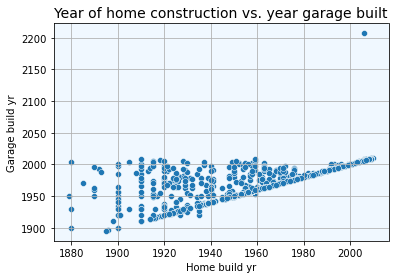

In [24]:
ax=plt.axes()
sns.scatterplot(x='year_built',y='garage_yr_blt',data=ames);
plt.xlabel('Home build yr')
plt.ylabel('Garage build yr')
plt.grid()
ax.set_facecolor("aliceblue");
plt.title('Year of home construction vs. year garage built', size=14);

In [25]:
ames.loc[ames['garage_yr_blt']==ames['garage_yr_blt'].max()]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1699,2261,916384070,SC20,RL,68.0,8298,Pave,None,3,HLS,0.0,Inside,3,Timber,Norm,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,None,NaN,4,3,PConc,4.0,3.0,3.0,6.0,583.0,1.0,0.0,963.0,1546.0,GasA,5,Y,5,1564,0,0,1564,0.0,0.0,2,0,2,1,5,6,7,1,4.0,Attchd,2207.0,2.0,2.0,502.0,3.0,3.0,Y,132,0,0,0,0,0,0.0,0.0,None,0,Sep,2007,New,267300


Looking at the NaNs in 'Garage Yr Built' shows that they all line up with properties with no garage.  0 is a tricky input as it will skew central tendency.  

Based on the scatterplot of year-of-home-build vs year-of-garage-build it would be logical enough to fill this value with the year of home build.  However this scatter also brings to light a typo (garage built in year 2207, and the more attentino I give this variable hee more I realize it is not important. There are six other variables relating to garages, the most important of which are likely car capacity, area, and quality.

Any information about garages will be preserved in the other columns about garages.

Drop 'Garage Yr Built' from dataframe.  (All drops at end of this null-review)

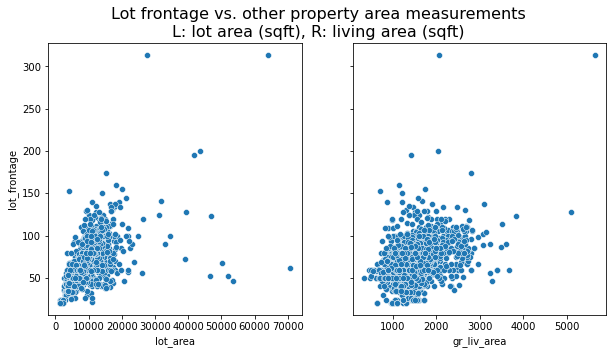

In [26]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5), sharey=True)
sns.scatterplot(x='lot_area',y='lot_frontage',data=ames, ax=ax1)
sns.scatterplot(x='gr_liv_area', y='lot_frontage', data=ames, ax=ax2)
plt.suptitle('Lot frontage vs. other property area measurements\nL: lot area (sqft), R: living area (sqft)', size=16);

Lot frontage is not obviously collinear with another attribute, like the garageX's.  The above scatters show a general positive correlation, but we can't easily derive lot frontage from other property 'area' metrics.  There are too many nulls to justify replacing with a Central Tendency value.  For an arguably low-priority feature when it comes to home-buying, it is safer (and easier) to remove from consideration.

Drop 'Lot Frontage' from dataframe. (All drops at end of this null-review)

In [27]:
ames.loc[ames['mas_vnr_area'].isna()].head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
22,2393,528142010,SC60,RL,103.0,12867,Pave,None,3,Lvl,0.0,Corner,3,NridgHt,Norm,Norm,1Fam,2Story,8,5,2005,2006,Gable,CompShg,CemntBd,CmentBd,None,NaN,4,3,PConc,5.0,3.0,3.0,1.0,0.0,1.0,0.0,1209.0,1209.0,GasA,5,Y,5,1209,1044,0,2253,0.0,0.0,2,1,3,1,5,8,7,1,4.0,Attchd,2005.0,3.0,2.0,575.0,3.0,3.0,Y,243,142,0,0,0,0,0.0,0.0,None,0,Jul,2006,New,344133
41,2383,528110050,SC20,RL,107.0,13891,Pave,None,4,Lvl,0.0,Inside,3,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,NaN,5,3,PConc,5.0,4.0,4.0,6.0,1386.0,1.0,0.0,690.0,2076.0,GasA,5,Y,5,2076,0,0,2076,1.0,0.0,2,1,2,1,5,7,7,1,4.0,Attchd,2006.0,3.0,3.0,850.0,3.0,3.0,Y,216,229,0,0,0,0,0.0,0.0,None,0,Sep,2006,New,465000
86,539,531371050,SC20,RL,67.0,10083,Pave,None,4,Lvl,0.0,Inside,3,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,None,NaN,4,3,PConc,4.0,3.0,1.0,6.0,833.0,1.0,0.0,343.0,1176.0,GasA,5,Y,5,1200,0,0,1200,1.0,0.0,2,0,2,1,4,5,7,0,0.0,Attchd,2003.0,2.0,2.0,555.0,3.0,3.0,Y,0,41,0,0,0,0,0.0,0.0,None,0,Aug,2009,WD,184900
212,518,528458020,SC20,FV,90.0,7993,Pave,None,3,Lvl,0.0,Inside,3,Somerst,Norm,Norm,1Fam,1Story,7,5,2008,2009,Gable,CompShg,VinylSd,VinylSd,None,NaN,4,3,PConc,5.0,3.0,1.0,1.0,0.0,1.0,0.0,1436.0,1436.0,GasA,5,Y,5,1436,0,0,1436,0.0,0.0,2,0,3,1,4,6,7,0,0.0,Attchd,2008.0,3.0,2.0,529.0,3.0,3.0,Y,0,121,0,0,0,0,0.0,0.0,None,0,Oct,2009,New,225000
276,2824,908130020,SC20,RL,75.0,8050,Pave,None,4,Lvl,0.0,Inside,3,Edwards,Norm,Norm,1Fam,1Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,None,NaN,3,3,PConc,4.0,3.0,3.0,6.0,475.0,5.0,297.0,142.0,914.0,GasA,5,Y,5,914,0,0,914,1.0,0.0,1,0,2,1,4,4,7,0,0.0,None,NaN,0.0,0.0,0.0,0.0,0.0,N,32,0,0,0,0,0,0.0,0.0,None,0,Apr,2006,WD,117250


The nulls in 'Masonry veneer area' all correspond to 'None' in 'Masonry veneer type'.  There is a 'None' category for the type.  We will replace these 22 nulls with 0s.  Instead of doing this for every continuous column one by one, they will all be treated at once at the end of this null review.

In [28]:
#ames['mas_vnr_area'] = ames['mas_vnr_area'].fillna(0)
#do fillna() for all type=float vars together in next segment

Onto the last handfull of nulls:

In [29]:
#ames.loc[ames['bsmt_half_bath'].isna()]

In [30]:
#ames.loc[ames['garage_cars'].isna()]

Like 'Masonry veneer area', the (single digit) basement and garage nulls all occur in listings that have no basement or garage, respectively.  The ordinal and nominal columns all have 0's per our earlier numerical assignments, so we will replace these continuous vars with 0 as well.

In [31]:
def discrete_fillnas(df, targetcols):
    for i in targetcols:
        df[i] = df[i].fillna(0)

In [32]:
fill0_continuous_vars = ['mas_vnr_area','bsmt_half_bath','bsmt_full_bath','bsmtfin_sf_1',
                         'bsmtfin_sf_2','total_bsmt_sf','bsmt_unf_sf','garage_cars','garage_area']

In [33]:
discrete_fillnas(ames, fill0_continuous_vars)

#### Proceed to drop: 'Lot Frontage', 'Garage Yr Built'.
---
##### Also drop 'Alley', 'Misc Features', 'Fence', 'Pool QC', and 'Pool Area' (by association with Pool QC)
---
Some of the decisions to preserve NaNs as 0s were made based on the small number of observations and speculation as to how those entries occurred.  It is a little questionable to apply these case-specific methods to cleaning the Test data as well.  However, seeing that random NaNs consistently correspond with "values that could reasonably be assumed to be None/0" is reassuring; so I will treat the Test data identically.  

Alley and Misc Feature are still nominal so not easily assigned a correlation value, but given their high instance of nulls (>90%), drop.  Given the low correlation with Saleprice, drop the ordinal/continuous metrics in question, too.

In [34]:
questionables = ames[['fence','pool_qc','pool_area','saleprice']]

In [35]:
questionables.corr()

,fence,pool_qc,pool_area,saleprice
fence,1.000000,0.115852,0.143468,-0.159060
pool_qc,0.115852,1.000000,0.904689,0.029275
pool_area,0.143468,0.904689,1.000000,0.023106
saleprice,-0.159060,0.029275,0.023106,1.000000


In [36]:
ames.drop(columns=['alley','misc_feature','garage_yr_blt', 'lot_frontage','fence','pool_qc','pool_area'],inplace=True)

## More pre-processing
Per the 'Special Notes' in the data dictionary, there are three true outliers in the data that are evident upon graphing Saleprice vs. 'Gr Live Area'.

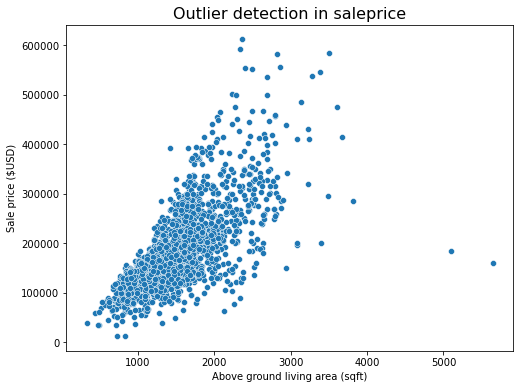

In [37]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='gr_liv_area',y='saleprice',data=ames);
plt.xlabel('Above ground living area (sqft)')
plt.ylabel('Sale price ($USD)')
plt.title('Outlier detection in saleprice', size=16);

The two points around 5000 sqft are identified as true outliers.  The provider of the dataset recommends removing any houses with more than 4000sqft from the data.  Thus:

In [38]:
ames=ames[ames['gr_liv_area']<4000]

### Identify binary vars and reformat as such
'Central air' just has Y and N entries.  Change to 1,0 (essentially same as dummifying + drop_first).  
'Paved drive' has Yes, No, and Partial entries.  To binarize, will include Partial into Yes.  
'Masonry veneer type' is awfully specific.  Let's reduce to has (1) or has not (0) veneer.

In [39]:
ames['central_air'] = ames['central_air'].map({'Y':1, 'N':0})
ames['paved_drive'] = ames['paved_drive'].map({'Y':1, 'P':1, 'N':0})
ames['mas_vnr_type'] = ames['mas_vnr_type'].map({'BrkFace':1, 'Stone':1, 'BrkCmn':1,
                                                'CBlock':1, 'None':0})

## Correlation
Now that things are clean(er), let's look at correlation of numeric vars.  Heatmap is overwhelming because overloaded with variables.  Let's fix that.

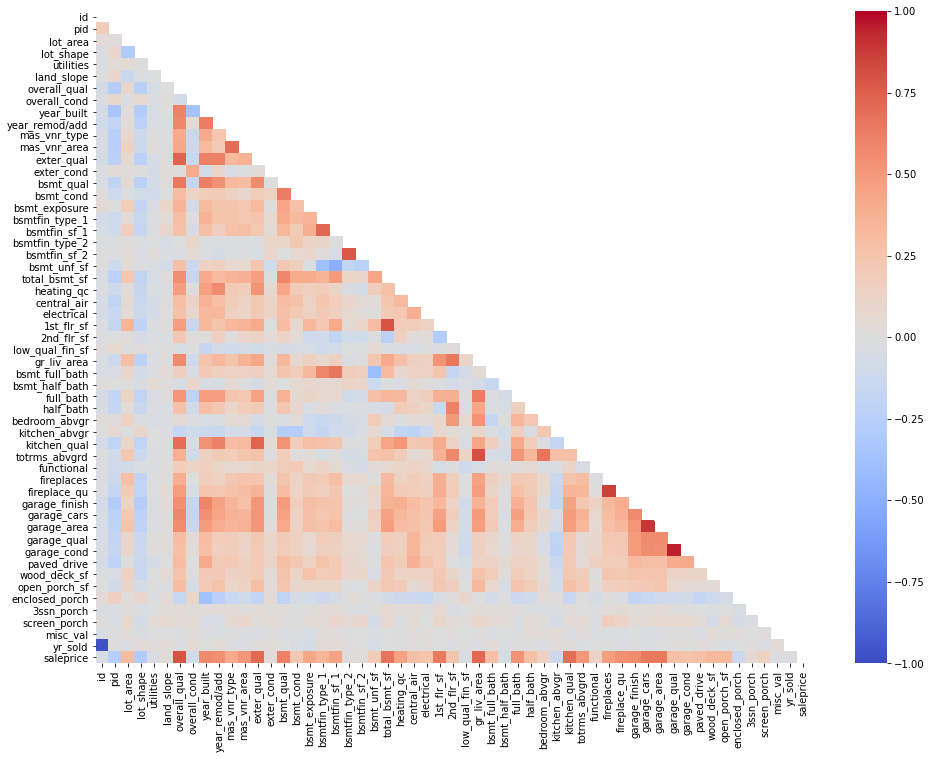

In [40]:
plt.figure(figsize=(16,12))
mask=np.zeros_like(ames.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(ames.corr(),cmap='coolwarm', annot=False,mask=mask, vmin=-1, vmax=1);

In [41]:
salecorr= ames.corr()[['saleprice']].sort_values('saleprice',ascending=False)
salecorr

,saleprice
saleprice,1.000000
overall_qual,0.803462
gr_liv_area,0.719463
exter_qual,0.715048
kitchen_qual,0.694295
total_bsmt_sf,0.665116
garage_area,0.655097
1st_flr_sf,0.648252
garage_cars,0.648227
bsmt_qual,0.613236


### Combine existing numeric features where possible
##### Inspired by source 3.  
'Overall quality' and 'overall condition' are two related variables: both on a scale of 1-10, represeing very poor to very excellent.  'Overall quality' is one of the highest correlated vars with saleprice, while Overall condition is essentially neutral.  Since they share a scale, I will create a new variable that multiplies these attributes together to produce a single score.

## Transform skewed numeric values
##### this whole section heavily taken from sources 3 and 4.
This makes the features more normal, ala the before and after histograms below.  "Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally. (source 3)."  Still working on fully synthesizing this, but the graphs below are evidence enough.  Log transformation should be used on highly skewed distributions to make outliers less influential, and make patterns more interpretable.

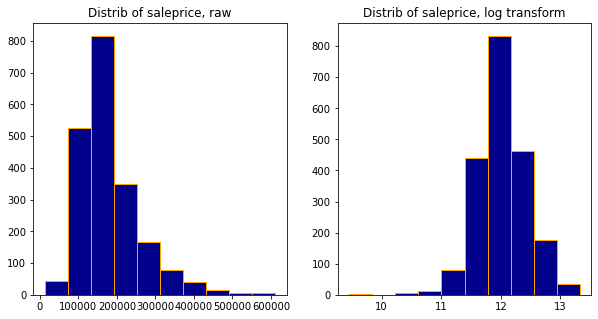

In [42]:
plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,1)
ax1.set_title('Distrib of saleprice, raw')
ax1.hist(ames['saleprice'], color = 'darkblue', ec='orange')

ax2 = plt.subplot(1,2,2)
ax2.set_title('Distrib of saleprice, log transform')
ax2.hist(np.log1p(ames['saleprice']),color='darkblue', ec='orange');

#plt.hist(np.log1p(ames['saleprice']))

In [43]:
#isolate numerical vs categorical vars
numberguys = ames.select_dtypes(exclude = ["object"]).columns #len=54, drop saleprice because target
#want X param separated for model input
categoriguys = ames.select_dtypes(include = ["object"]).columns  #len=19

ames_nums= ames[numberguys].drop(columns='saleprice')
ames_cats= ames[categoriguys]

In [44]:
#find skewed numeric features.  Code from source 3, and 4
#"general rule of thumb, abv(skew)>.5 is 'moderately skewed'" - source 3
allskew = ames_nums.apply(lambda x: skew(x))
sigskew = allskew[abs(allskew)>0.5]  #len=38 vars for transformation

In [45]:
#remove saleprice because it is target
#keep features separated for model input
ames['saleprice'] = np.log1p(ames['saleprice'])
y = ames['saleprice']

In [47]:
sigskew_index= sigskew.index #source 3
ames_nums[sigskew_index] = np.log1p(ames_nums[sigskew.index])

<ipython-input-47-1ab4704c883f>:2: RuntimeWarning: invalid value encountered in log1p
  ames_nums[sigskew_index] = np.log1p(ames_nums[sigskew.index])
